In [1]:

import pickle
import matplotlib.pyplot as plt
import numpy as np
%run functions_continuous.ipynb

# Download data

In [2]:

symbol = "BTCUSDT"
temporalidad="4h"
"""initial_year=2022
end_year = 2025
month=7
day=1"""

initial_year=2022
end_year = 2025
month=7
day=1

#download_data_from_binance(symbol, temporalidad, initial_year, end_year)

#symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]


"""
for symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:
    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)"""

'\nfor symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:\n    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)'

### Estandarizar data

In [3]:
df = parse_binance_files(f"data/spot/daily/klines/{symbol}/{temporalidad}") #, temporalidad)
#df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}/{temporalidad}") #, temporalidad)

df = df[int(len(df)/2):].reset_index(drop=True) # Filtro por últimos años

print(len(df))
#df.to_csv("parsed_df.csv")

1737


## Matriz de trancisión

In [4]:
ORDER = 2
%run functions_continuous.ipynb

# Segundo orden con tendencia
transition_matrix, transition_counts, df = order_n_matrix(df, 
                                                    order=ORDER)

transition_matrix["direction"] = np.where(
    transition_matrix["up"] > 
    transition_matrix["dw"],
    "up",
    "dw"
)
target_factor = 0.53

relevant_transition_matrix = transition_matrix[
    ((transition_matrix["up"] > target_factor) |
    (transition_matrix["dw"] > target_factor)) &
    (transition_matrix["binom_p"] < 0.01)
].copy() 



print(relevant_transition_matrix)

Empty DataFrame
Columns: [dw, up, binom_p, direction]
Index: []


In [5]:
# Juan Diego, recordá chequear qué pasó con el df_valid. Eso puede ser muy problemático

%run functions_continuous.ipynb

patterns_with_expansions = []
for idx, row in transition_matrix.iterrows():
    pattern = (idx[0], idx[1], row["direction"])
    expansions = compute_expansions(df, pattern)
    pattern_expanded = (idx[0], idx[1], row["direction"], expansions)
    patterns_with_expansions.append(pattern_expanded)

In [6]:
"""%run functions_continuous.ipynb

valid_patterns = []
for i in np.arange(len(patterns_with_expansions)):

    single_pattern_with_expansion = patterns_with_expansions[i]
    expansion_metrics = list(single_pattern_with_expansion[-1]["adversarial"].keys())
    
    for exps in expansion_metrics:
        mam = single_pattern_with_expansion[-1]["adversarial"][exps]
        df_equity = run_simulation_sl_only(df,
                                single_pattern_with_expansion,
                                sl_val = mam)

        valid_pattern = plot_conditional_equity(df_equity, 
                                single_pattern_with_expansion,
                                exp=exps)
        
        if valid_pattern:
            valid_patterns.append(valid_pattern)
"""

'%run functions_continuous.ipynb\n\nvalid_patterns = []\nfor i in np.arange(len(patterns_with_expansions)):\n\n    single_pattern_with_expansion = patterns_with_expansions[i]\n    expansion_metrics = list(single_pattern_with_expansion[-1]["adversarial"].keys())\n    \n    for exps in expansion_metrics:\n        mam = single_pattern_with_expansion[-1]["adversarial"][exps]\n        df_equity = run_simulation_sl_only(df,\n                                single_pattern_with_expansion,\n                                sl_val = mam)\n\n        valid_pattern = plot_conditional_equity(df_equity, \n                                single_pattern_with_expansion,\n                                exp=exps)\n        \n        if valid_pattern:\n            valid_patterns.append(valid_pattern)\n'

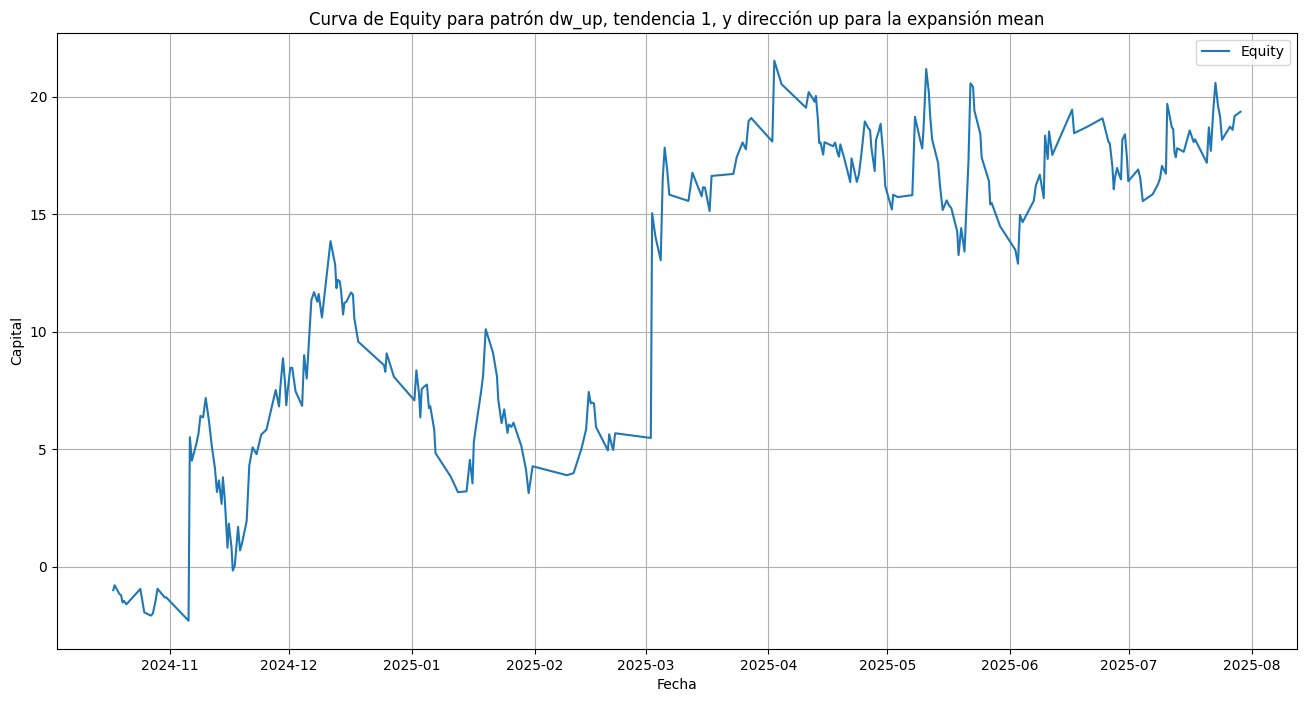

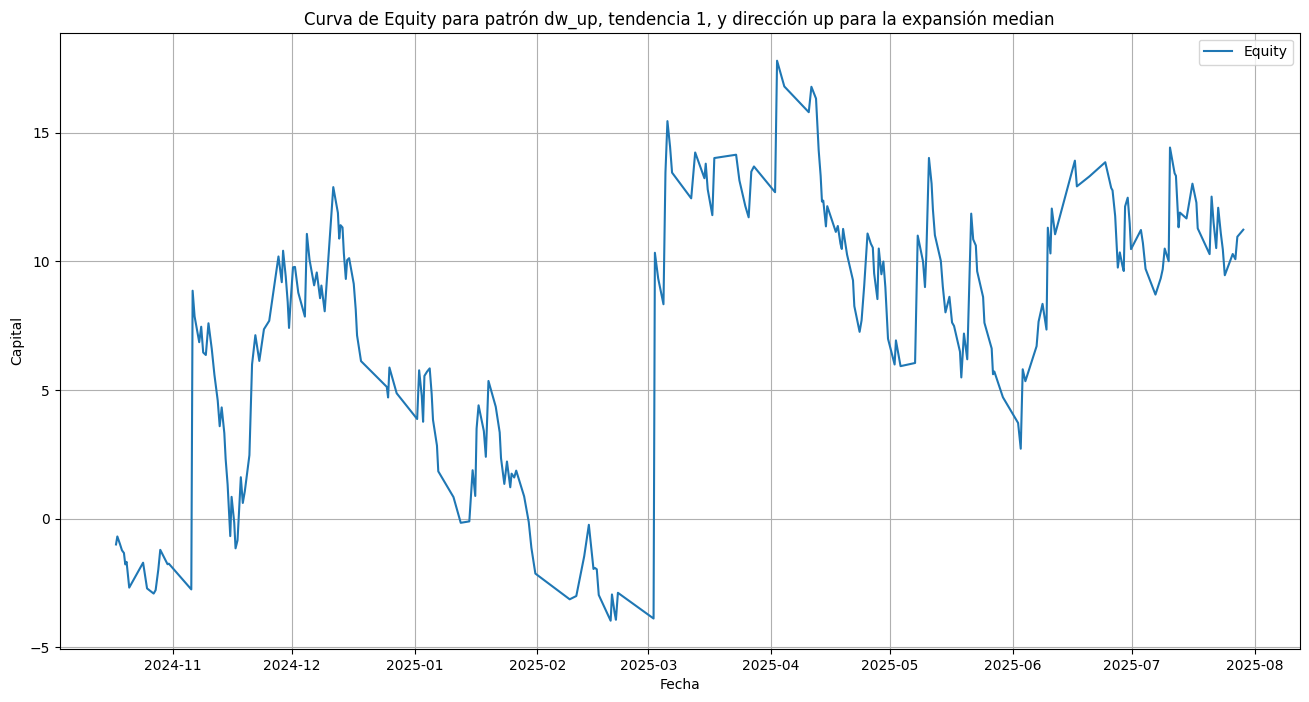

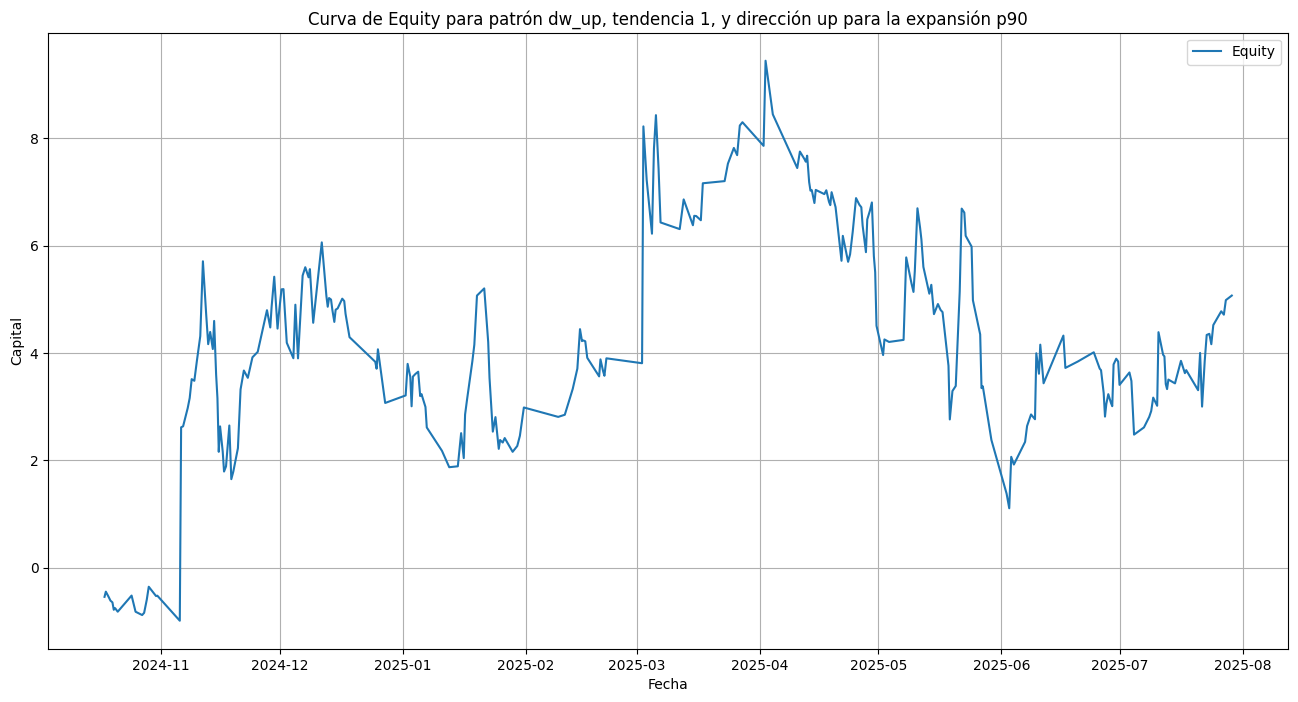

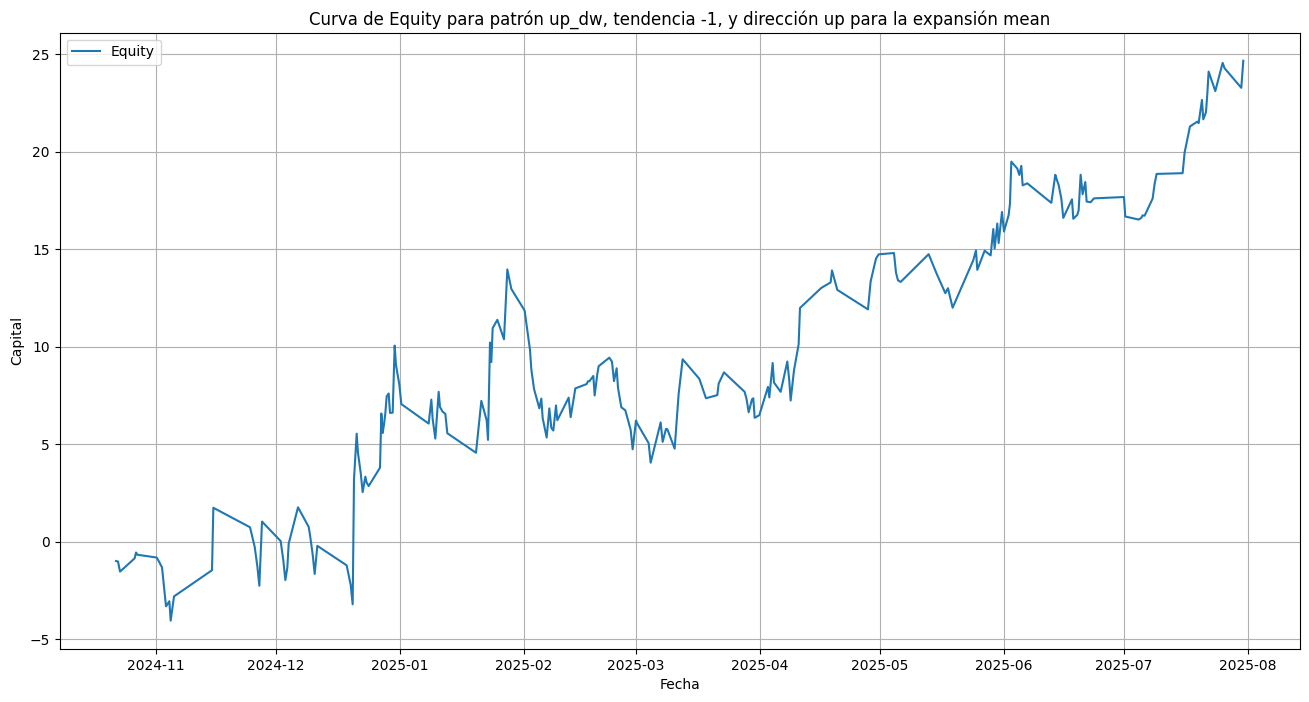

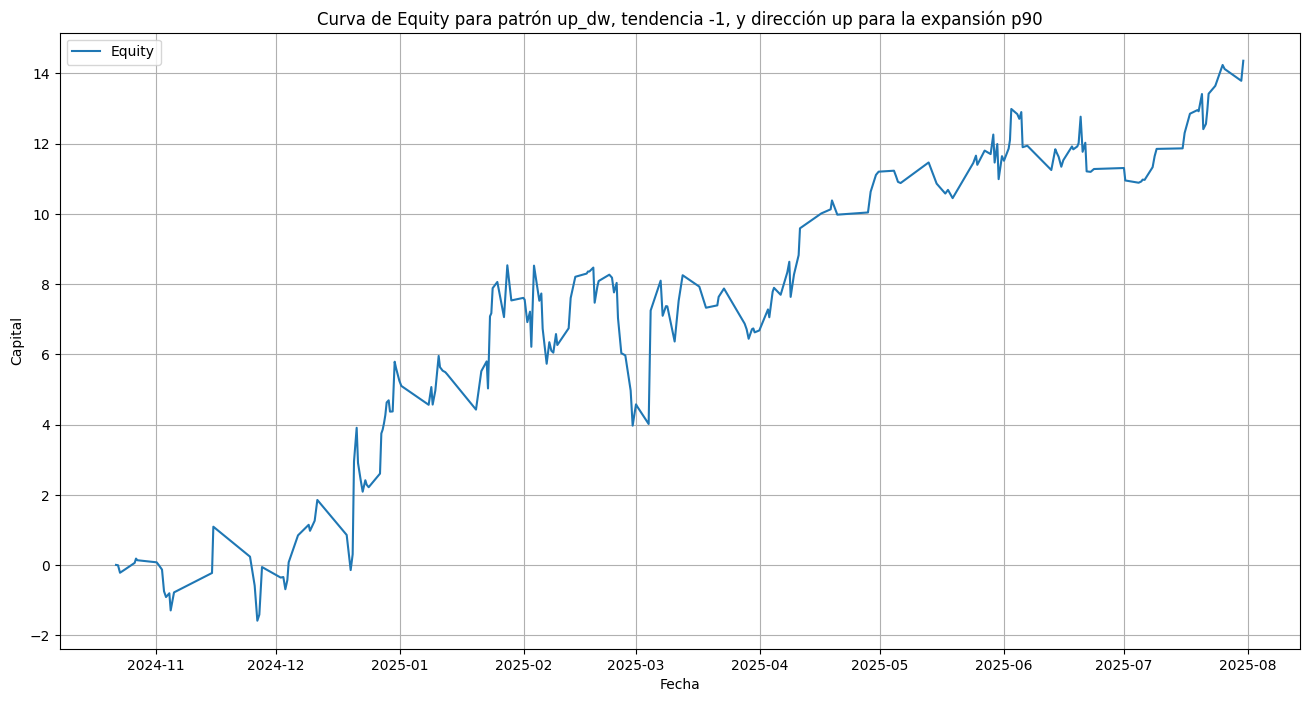

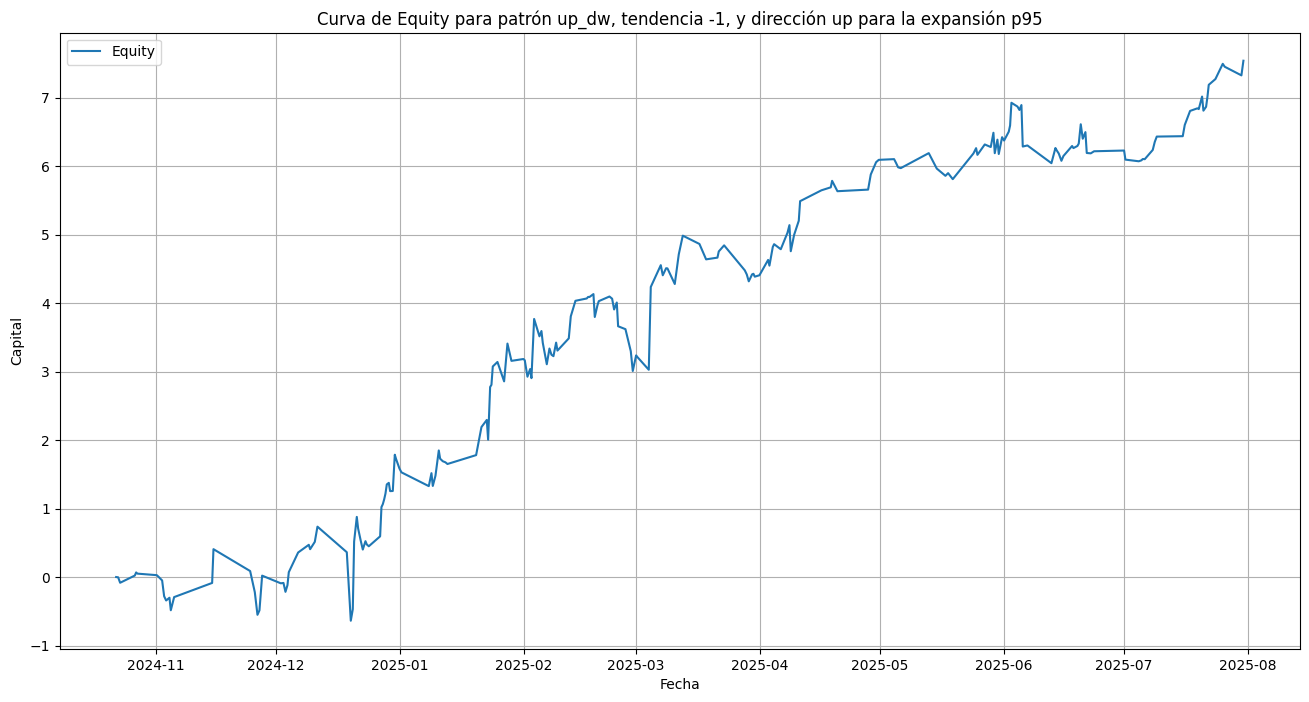

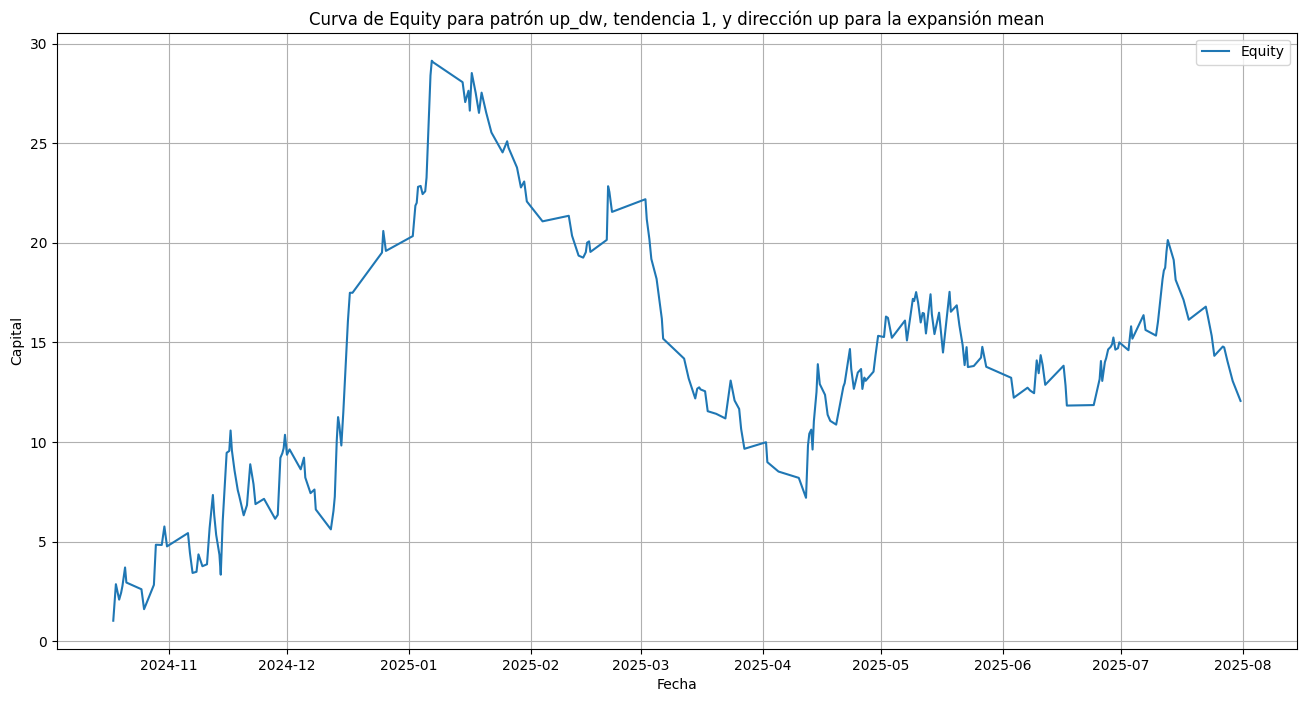

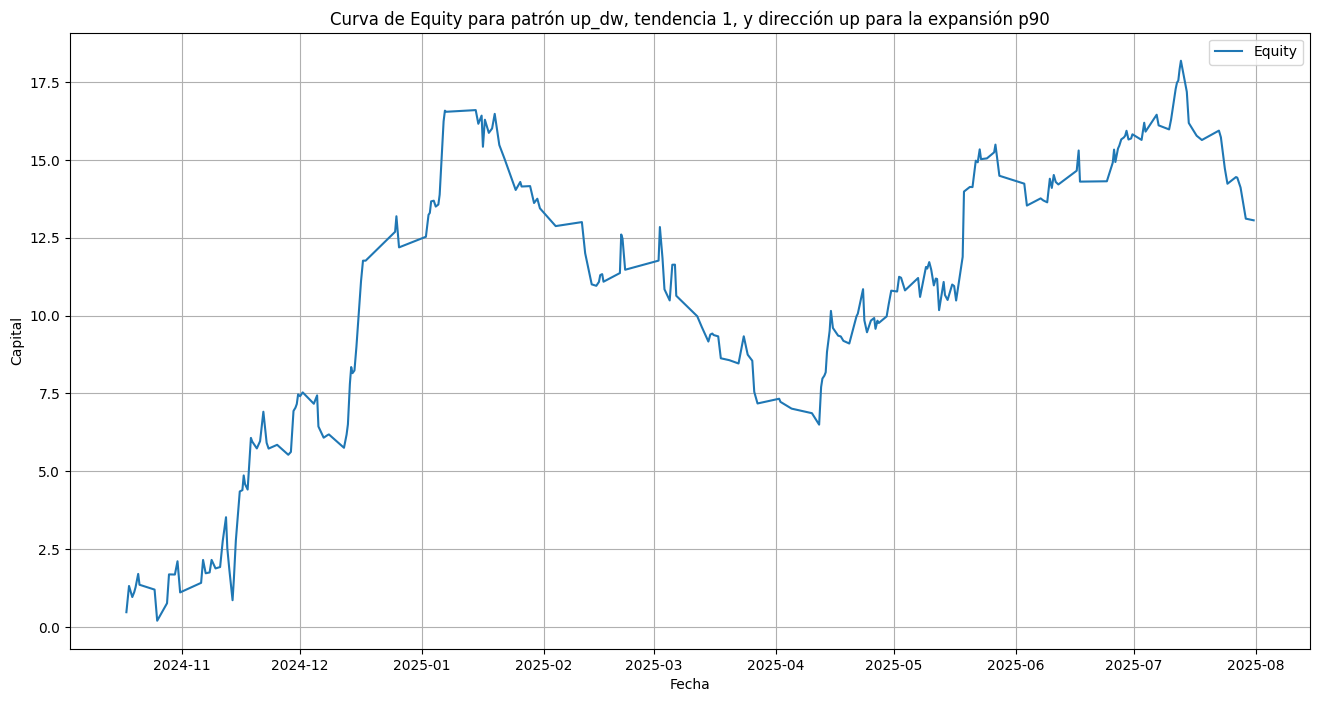

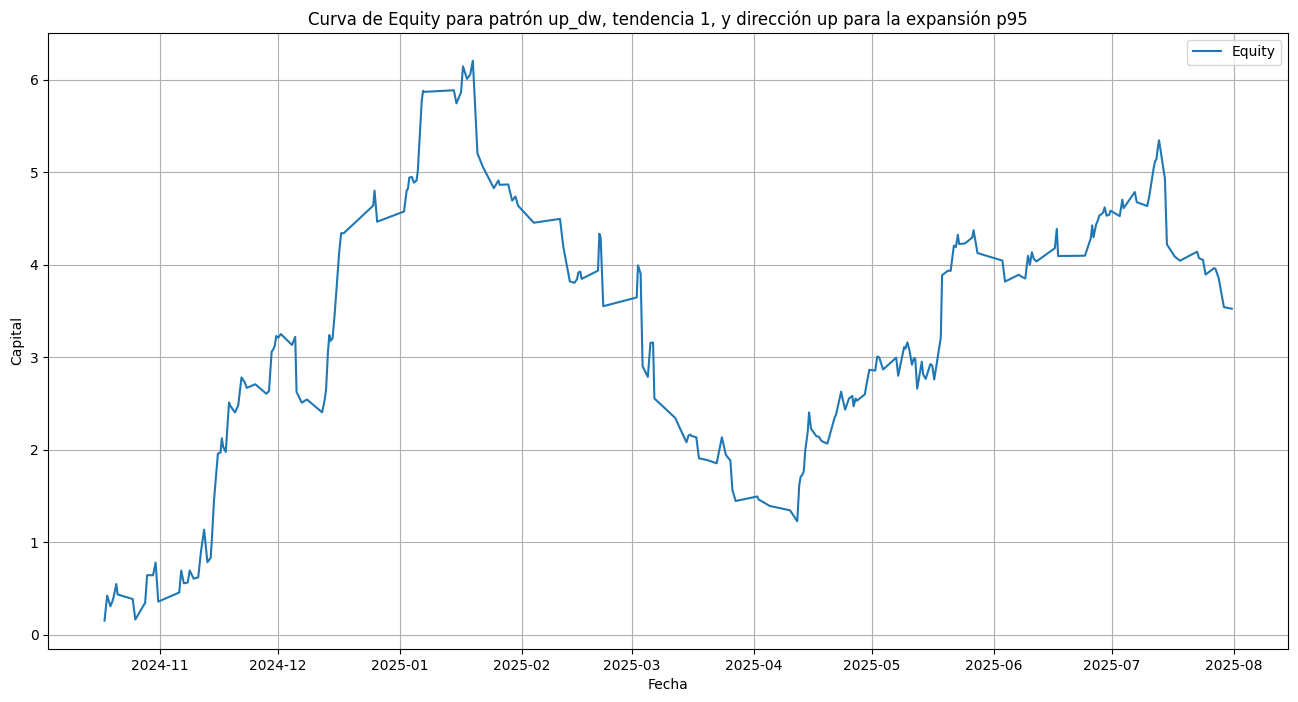

In [7]:
%run functions_continuous.ipynb

valid_patterns = []
for i in np.arange(len(patterns_with_expansions)):

    single_pattern_with_expansion = patterns_with_expansions[i]
    expansion_metrics = list(single_pattern_with_expansion[-1]["adversarial"].keys())
    
    for exps in expansion_metrics:
        mam = single_pattern_with_expansion[-1]["adversarial"][exps]
        df_equity = run_simulation_sl_only(df,
                                single_pattern_with_expansion,
                                sl_val = mam)

        valid_pattern = plot_conditional_equity(df_equity, 
                                single_pattern_with_expansion,
                                exp=exps)
        
        if valid_pattern:
            valid_patterns.append(valid_pattern)


In [18]:
import json
import numpy as np
from IPython.display import clear_output

%run functions_continuous.ipynb

symbols = ["BTCUSDT", "ADAUSDT", "ATOMUSDT", "AVAXUSDT", "BNBUSDT", "DOGEUSDT", "DOTUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "MATICUSDT", "NEARUSDT", "SHIBUSDT", "SOLUSDT", "TONUSDT", "UNIUSDT", "XRPUSDT"]
timeframes = ["1h", "4h"]
matrix_orders = [2, 3, 4]
output = {}

for SYMBOL in symbols:
    print()
    print()
    print(f"======================== Procesando: {SYMBOL} ==========================")
    print()
    print()
    for TEMPORALIDAD in timeframes:
        for ORDER in matrix_orders:

            # download_data_from_binance(SYMBOL, TEMPORALIDAD, initial, end)
            df = parse_binance_files(f"data/spot/daily/klines/{SYMBOL}/{TEMPORALIDAD}")
            
            transition_matrix, transition_counts, df = order_n_matrix(df, order=ORDER)
            transition_matrix["direction"] = np.where(
                transition_matrix["up"] > transition_matrix["dw"], "up", "dw"
            )
            
            patterns_with_expansions = []
            for idx, row in transition_matrix.iterrows():
                pattern = (idx[0], idx[1], row["direction"])
                expansions = compute_expansions(df, pattern)
                pattern_expanded = (idx[0], idx[1], row["direction"], expansions)
                patterns_with_expansions.append(pattern_expanded)
                
            patrones_validos = []
            for pattern_with_expansion in patterns_with_expansions:
                expansion_metrics = list(pattern_with_expansion[-1]["adversarial"].keys())
                for exps in expansion_metrics:
                    mam = pattern_with_expansion[-1]["adversarial"][exps]
                    df_equity = run_simulation_sl_only(df, pattern_with_expansion, sl_val=mam)
                    valid_pattern = plot_conditional_equity(df_equity, pattern_with_expansion, exp=exps)
                    if valid_pattern:
                        patrones_validos.append(valid_pattern)
                        
            output[f"{SYMBOL}_{TEMPORALIDAD}_{ORDER}"] = patrones_validos
    clear_output()

with open("symbol_temporalidad_order_adversarial_expansion.json", "w") as f:
    json.dump(output, f, indent=4)


In [19]:
output

{'BTCUSDT_1h_2': [[('dw_dw', -1, 'up', 331.43)],
  [('dw_dw', -1, 'up', 196.15)],
  [('dw_dw', -1, 'up', 765.72)],
  [('dw_dw', -1, 'up', 1852.5)],
  [('dw_dw', 1, 'up', 231.62)],
  [('dw_dw', 1, 'up', 140.9)],
  [('dw_dw', 1, 'up', 546.02)],
  [('dw_dw', 1, 'up', 1462.08)],
  [('dw_up', -1, 'up', 284.01)],
  [('dw_up', -1, 'up', 171.5)],
  [('dw_up', 1, 'dw', 169.62)],
  [('up_dw', -1, 'up', 312.59)],
  [('up_dw', -1, 'up', 182.94)],
  [('up_dw', 1, 'up', 249.24)],
  [('up_dw', 1, 'up', 161.84)],
  [('up_dw', 1, 'up', 551.49)],
  [('up_dw', 1, 'up', 1637.26)],
  [('up_up', 1, 'dw', 175.89)],
  [('up_up', 1, 'dw', 643.03)],
  [('up_up', 1, 'dw', 1627.94)]],
 'BTCUSDT_1h_3': [[('dw_dw_dw', -1, 'up', 327.74)],
  [('dw_dw_dw', -1, 'up', 198.23)],
  [('dw_dw_dw', -1, 'up', 761.66)],
  [('dw_dw_dw', -1, 'up', 1888.74)],
  [('dw_dw_up', -1, 'up', 289.75)],
  [('dw_dw_up', -1, 'up', 169.48)],
  [('dw_dw_up', 1, 'dw', 164.76)],
  [('dw_up_dw', -1, 'up', 191.8)],
  [('dw_up_dw', 1, 'up', 258.82

In [10]:
import json

# Guardar en JSON (convertir tuplas a string)
output_serializable = {f"{k[0]}_{k[1]}_{k[2]}": v for k, v in output.items()}

with open("symbol_temporalidad_order_adversarial_expansion.json", "w") as f:
    json.dump(output_serializable, f, indent=4)

In [11]:
output

{('BTCUSDT', '1h', 2): [[('dw_up', 1, 'up', 636.98)],
  [('dw_up', 1, 'up', 428.84)],
  [('dw_up', 1, 'up', 1380.67)],
  [('up_dw', -1, 'up', 664.77)],
  [('up_dw', -1, 'up', 1616.24)],
  [('up_dw', -1, 'up', 4319.98)],
  [('up_dw', 1, 'up', 563.81)],
  [('up_dw', 1, 'up', 1225.66)],
  [('up_dw', 1, 'up', 3804.58)],
  [('dw_dw', -1, 'up', 1852.5)],
  [('dw_dw', 1, 'up', 1462.08)],
  [('up_dw', 1, 'up', 1637.26)],
  [('up_up', 1, 'dw', 1627.94)],
  [('dw_dw_dw', -1, 'up', 1888.74)],
  [('dw_up_up', -1, 'up', 1527.38)],
  [('up_dw_dw', 1, 'up', 1483.6)],
  [('up_up_up', 1, 'dw', 1695.86)],
  [('dw_dw_dw_dw', -1, 'up', 1807.1)],
  [('dw_up_up_dw', -1, 'up', 1664.72)],
  [('dw_up_up_up', -1, 'dw', 1408.42)],
  [('dw_up_up_up', 1, 'dw', 1764.58)],
  [('up_dw_dw_up', -1, 'up', 1735.6)],
  [('up_dw_up_dw', -1, 'up', 1600.44)],
  [('up_dw_up_dw', 1, 'up', 1688.16)],
  [('up_dw_up_up', -1, 'up', 1688.0)],
  [('up_dw_up_up', 1, 'dw', 1615.12)],
  [('up_up_dw_up', 1, 'dw', 1644.74)],
  [('up_up_u

In [12]:
output

{('BTCUSDT', '1h', 2): [[('dw_up', 1, 'up', 636.98)],
  [('dw_up', 1, 'up', 428.84)],
  [('dw_up', 1, 'up', 1380.67)],
  [('up_dw', -1, 'up', 664.77)],
  [('up_dw', -1, 'up', 1616.24)],
  [('up_dw', -1, 'up', 4319.98)],
  [('up_dw', 1, 'up', 563.81)],
  [('up_dw', 1, 'up', 1225.66)],
  [('up_dw', 1, 'up', 3804.58)],
  [('dw_dw', -1, 'up', 1852.5)],
  [('dw_dw', 1, 'up', 1462.08)],
  [('up_dw', 1, 'up', 1637.26)],
  [('up_up', 1, 'dw', 1627.94)],
  [('dw_dw_dw', -1, 'up', 1888.74)],
  [('dw_up_up', -1, 'up', 1527.38)],
  [('up_dw_dw', 1, 'up', 1483.6)],
  [('up_up_up', 1, 'dw', 1695.86)],
  [('dw_dw_dw_dw', -1, 'up', 1807.1)],
  [('dw_up_up_dw', -1, 'up', 1664.72)],
  [('dw_up_up_up', -1, 'dw', 1408.42)],
  [('dw_up_up_up', 1, 'dw', 1764.58)],
  [('up_dw_dw_up', -1, 'up', 1735.6)],
  [('up_dw_up_dw', -1, 'up', 1600.44)],
  [('up_dw_up_dw', 1, 'up', 1688.16)],
  [('up_dw_up_up', -1, 'up', 1688.0)],
  [('up_dw_up_up', 1, 'dw', 1615.12)],
  [('up_up_dw_up', 1, 'dw', 1644.74)],
  [('up_up_u